In [76]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
from itertools import combinations
from scipy.stats import ttest_ind
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
RANDOM_SEED = 42
!pip freeze > requirements.txt

In [161]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
# df_train = pd.read_csv(DATA_DIR+'main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
# sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')
df_train = pd.read_csv('g:\SkillFactory\–æ –≤–∫—É—Å–Ω–æ–π –∏ –∑–¥–æ—Ä–æ–≤–æ–π –ø–∏—â–µ\–î–∞–Ω–Ω—ã–µ\main_task.csv')
df_test = pd.read_csv('g:\SkillFactory\–æ –≤–∫—É—Å–Ω–æ–π –∏ –∑–¥–æ—Ä–æ–≤–æ–π –ø–∏—â–µ\–î–∞–Ω–Ω—ã–µ\kaggle_task.csv')
sample_submission = pd.read_csv('g:\SkillFactory\–æ –≤–∫—É—Å–Ω–æ–π –∏ –∑–¥–æ—Ä–æ–≤–æ–π –ø–∏—â–µ\–î–∞–Ω–Ω—ã–µ\sample_submission.csv')
# –í–ê–ñ–ù–û! –¥—Ä—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–±—ä–µ–¥–∏–Ω—è–µ–º —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Å–µ—Ç
df_train['sample'] = 1 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç—Ä–µ–π–Ω
df_test['sample'] = 0 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç–µ—Å—Ç
df_test['Rating'] = 0 # –≤ —Ç–µ—Å—Ç–µ —É –Ω–∞—Å –Ω–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è Rating, –º—ã –µ–≥–æ –¥–æ–ª–∂–Ω—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –ø–æ —ç—Ç–æ–º—É –ø–æ–∫–∞ –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏

df = df_test.append(df_train, sort = False).reset_index(drop = True) # –æ–±—ä–µ–¥–∏–Ω—è–µ–º

In [3]:
# —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á–µ—Ç–∞ –≤—ã–±—Ä–æ—Å–æ–≤
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [4]:
# —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á–µ—Ç–∞ —Å—Ç–∞–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–µ–π
def get_stat_dif(column):
    cols = df_stat.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_stat.loc[df_stat.loc[:, column] == comb[0], 'rating'], 
                        df_stat.loc[df_stat.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # –£—á–ª–∏ –ø–æ–ø—Ä–∞–≤–∫—É –ë–æ–Ω—Ñ–µ—Ä–æ–Ω–∏
            print('–ù–∞–π–¥–µ–Ω—ã —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –¥–ª—è –∫–æ–ª–æ–Ω–∫–∏', column)
            break

In [5]:
# —Ñ—É–Ω–∫—Ü–∏—è –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
def round_pred(y_pred):
    return [(round(y / 0.5) * 0.5) for y in y_pred]

In [6]:
# —Ñ—É–Ω–∫—Ü–∏—è minmax –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å—Ç–æ–ª–±—Ü–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞
def MMS(ser):
    scaler = MinMaxScaler()
    x = np.array(ser).reshape(len(ser), 1)
    a = scaler.fit_transform(x)
    a_s = pd.Series(a.flatten())
    return a_s

In [7]:
# —Ñ—É–Ω–∫—Ü–∏—è std –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å—Ç–æ–ª–±—Ü–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞
def stdS(ser):
    scaler = StandardScaler()
    x = np.array(ser).reshape(len(ser), 1)
    a = scaler.fit_transform(x)
    a_s = pd.Series(a.flatten())
    return a_s

In [8]:
df

Restaurant_id        City  \
0              id_0       Paris   
1              id_1    Helsinki   
2              id_2   Edinburgh   
3              id_3      London   
4              id_4  Bratislava   
...             ...         ...   
49995        id_499       Milan   
49996       id_6340       Paris   
49997       id_1649   Stockholm   
49998        id_640      Warsaw   
49999       id_4824       Milan   

                                           Cuisine Style  Ranking Price Range  \
0                                         ['Bar', 'Pub']  12963.0    $$ - $$$   
1      ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                                ['Vegetarian Friendly']    810.0    $$ - $$$   
3      ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4      ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   
...                                                  ...      ...         ...   
49995  ['Italian', 'Vegetarian Friendly', 'Vegan Opti...    500.0    $$ - $$$   
49996  ['French', 'American', 'Bar', 'European', 'Veg...   6341.0    $$ - $$$   
49997                              ['Japanese', 'Sushi']   1652.0         NaN   
49998  ['Polish', 'European', 'Eastern European', 'Ce...    641.0    $$ - $$$   
49999                                        ['Spanish']   4827.0    $$ - $$$   

       Number of Reviews                                            Reviews  \
0                    4.0                                           [[], []]   
1                   97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2                   28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3                  202.0  [['Most exquisite', 'Delicious and authentic']...   
4                  162.0  [['Always the best in bratislava', 'Very good ...   
...                  ...                                                ...   
49995               79.0  [['The real Italian experience!', 'Wonderful f...   
49996              542.0  [['Parisian atmosphere', 'Bit pricey but inter...   
49997                4.0  [['Good by swedish standards', 'A hidden jewel...   
49998               70.0  [['Underground restaurant', 'Oldest Restaurant...   
49999              260.0  [['Average', 'Nice an informal'], ['01/31/2016...   

                                                  URL_TA      ID_TA  sample  \
0      /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1      /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2      /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3      /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4      /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   
...                                                  ...        ...     ...   
49995  /Restaurant_Review-g187849-d2104414-Reviews-Ro...   d2104414       1   
49996  /Restaurant_Review-g187147-d1800036-Reviews-La...   d1800036       1   
49997  /Restaurant_Review-g189852-d947615-Reviews-Sus...    d947615       1   
49998  /Restaurant_Review-g274856-d1100838-Reviews-Ho...   d1100838       1   
49999  /Restaurant_Review-g187849-d1109020-Reviews-Ta...   d1109020       1   

       Rating  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
49995     4.5  
49996     3.5  
49997     4.5  
49998     4.0  
49999     3.0  

[50000 rows x 11 columns]

In [9]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [162]:
df.columns = ['id', 'city', 'cuisine', 'ranking',
       'price', 'number', 'reviews', 'URL_TA', 'ID_TA',
       'sample','rating']

In [11]:
df

id        city                                            cuisine  \
0         id_0       Paris                                     ['Bar', 'Pub']   
1         id_1    Helsinki  ['European', 'Scandinavian', 'Gluten Free Opti...   
2         id_2   Edinburgh                            ['Vegetarian Friendly']   
3         id_3      London  ['Italian', 'Mediterranean', 'European', 'Vege...   
4         id_4  Bratislava  ['Italian', 'Mediterranean', 'European', 'Seaf...   
...        ...         ...                                                ...   
49995   id_499       Milan  ['Italian', 'Vegetarian Friendly', 'Vegan Opti...   
49996  id_6340       Paris  ['French', 'American', 'Bar', 'European', 'Veg...   
49997  id_1649   Stockholm                              ['Japanese', 'Sushi']   
49998   id_640      Warsaw  ['Polish', 'European', 'Eastern European', 'Ce...   
49999  id_4824       Milan                                        ['Spanish']   

       ranking     price  number  \
0      12963.0  $$ - $$$     4.0   
1        106.0  $$ - $$$    97.0   
2        810.0  $$ - $$$    28.0   
3       1669.0      $$$$   202.0   
4         37.0      $$$$   162.0   
...        ...       ...     ...   
49995    500.0  $$ - $$$    79.0   
49996   6341.0  $$ - $$$   542.0   
49997   1652.0       NaN     4.0   
49998    641.0  $$ - $$$    70.0   
49999   4827.0  $$ - $$$   260.0   

                                                 reviews  \
0                                               [[], []]   
1      [['Very good reviews!', 'Fine dining in Hakani...   
2      [['Better than the Links', 'Ivy Black'], ['12/...   
3      [['Most exquisite', 'Delicious and authentic']...   
4      [['Always the best in bratislava', 'Very good ...   
...                                                  ...   
49995  [['The real Italian experience!', 'Wonderful f...   
49996  [['Parisian atmosphere', 'Bit pricey but inter...   
49997  [['Good by swedish standards', 'A hidden jewel...   
49998  [['Underground restaurant', 'Oldest Restaurant...   
49999  [['Average', 'Nice an informal'], ['01/31/2016...   

                                                  URL_TA      ID_TA  sample  \
0      /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1      /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2      /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3      /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4      /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   
...                                                  ...        ...     ...   
49995  /Restaurant_Review-g187849-d2104414-Reviews-Ro...   d2104414       1   
49996  /Restaurant_Review-g187147-d1800036-Reviews-La...   d1800036       1   
49997  /Restaurant_Review-g189852-d947615-Reviews-Sus...    d947615       1   
49998  /Restaurant_Review-g274856-d1100838-Reviews-Ho...   d1100838       1   
49999  /Restaurant_Review-g187849-d1109020-Reviews-Ta...   d1109020       1   

       rating  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
49995     4.5  
49996     3.5  
49997     4.5  
49998     4.0  
49999     3.0  

[50000 rows x 11 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       50000 non-null  object 
 1   city     50000 non-null  object 
 2   cuisine  38410 non-null  object 
 3   ranking  50000 non-null  float64
 4   price    32639 non-null  object 
 5   number   46800 non-null  float64
 6   reviews  49998 non-null  object 
 7   URL_TA   50000 non-null  object 
 8   ID_TA    50000 non-null  object 
 9   sample   50000 non-null  int64  
 10  rating   50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


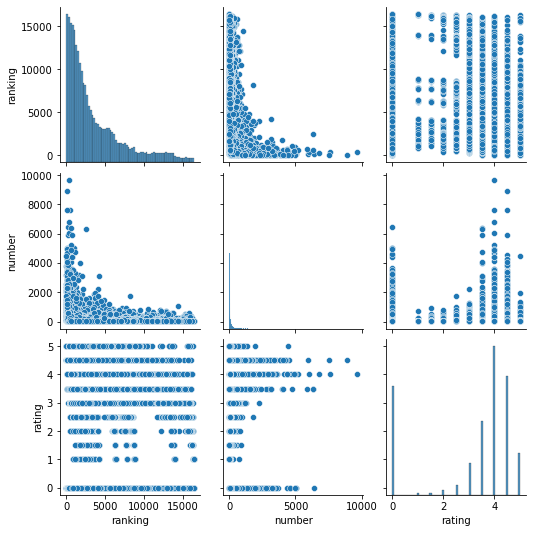

In [13]:
sns.pairplot(df.drop(['sample'], axis = 1))




# cuisine

In [14]:
df.cuisine

0                                           ['Bar', 'Pub']
1        ['European', 'Scandinavian', 'Gluten Free Opti...
2                                  ['Vegetarian Friendly']
3        ['Italian', 'Mediterranean', 'European', 'Vege...
4        ['Italian', 'Mediterranean', 'European', 'Seaf...
                               ...                        
49995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
49996    ['French', 'American', 'Bar', 'European', 'Veg...
49997                                ['Japanese', 'Sushi']
49998    ['Polish', 'European', 'Eastern European', 'Ce...
49999                                          ['Spanish']
Name: cuisine, Length: 50000, dtype: object

In [15]:
df.cuisine[1]

"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"

–ø–æ–ª—É—á–∏–ª–∞—Å—å —Å—Ç—Ä–æ–∫–∞ —Å–ø–∏—Å–∫–∞ —Å—Ç—Ä–æ–∫, –Ω—É–∂–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å

In [16]:
# —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å–≤—Ç–æ –Ω—É–ª–µ–≤—ã—Ö —Å—Ç—Ä–æ–∫
df.cuisine.isna().sum()

11590

In [17]:
# –∫–æ–ª–∏—á–µ—Å–≤—Ç–æ –Ω—É–ª–µ–≤—ã—Ö —Å—Ç—Ä–æ–∫ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö
df.cuisine.isna().sum()/len(df)*100

23.18

–º—ã –≤–∏–¥–∏–º –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫, –Ω–æ –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ –Ω–µ –º–æ–∂–µ—Ç –Ω–µ –±—ã—Ç—å –∫—É—Ö–Ω–∏, –∫–∞–∫ –º–∏–Ω–∏–º—É–º –æ–¥–Ω–∞ –≤—Å–µ —Ä–∞–≤–Ω–æ –µ—Å—Ç—å

In [163]:
# –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç—Ä–æ–∫—É —Å–ø–∏—Å–∫–∞ –≤ —Å–ø–∏—Å–æ–∫ –∏ –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏ –Ω–∞–∑–æ–≤–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –∫—É—Ö–Ω—è
df3 = df.cuisine
df3 = df3.fillna('[standart]')
df3 = df3.apply(lambda x: str(x)[1:-1])
df3 = df3.apply(lambda x: x.replace("'", ''))
df3 = df3.str.split(', ')

In [19]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df3[1]

['European',
 'Scandinavian',
 'Gluten Free Options',
 'Vegetarian Friendly',
 'Vegan Options']

In [164]:
# –ø–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É—Ö–æ–Ω—å
cuisine_all = df3.explode()
print(cuisine_all.value_counts())
print(cuisine_all.value_counts(normalize = True))
print(cuisine_all.nunique())

Vegetarian Friendly    14021
European               12561
standart               11590
Mediterranean           7820
Italian                 7433
                       ...  
Yunnan                     2
Burmese                    1
Xinjiang                   1
Salvadoran                 1
Latvian                    1
Name: cuisine, Length: 126, dtype: int64
Vegetarian Friendly    0.106814
European               0.095691
standart               0.088294
Mediterranean          0.059574
Italian                0.056625
                         ...   
Yunnan                 0.000015
Burmese                0.000008
Xinjiang               0.000008
Salvadoran             0.000008
Latvian                0.000008
Name: cuisine, Length: 126, dtype: float64
126


In [81]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –∫–æ–ª–æ–Ω–∫—É –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π
df_stat = pd.DataFrame()
df_stat['cuisine'] = df3
df_stat['rating'] = df['rating']
df_stat['sample'] = df['sample']
df_stat = df_stat.explode('cuisine')
df_stat = df_stat[df_stat['sample'] == 1]
df_stat = df_stat[df_stat['cuisine'] != '']
get_stat_dif('cuisine')

–ù–∞–π–¥–µ–Ω—ã —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –¥–ª—è –∫–æ–ª–æ–Ω–∫–∏ cuisine


In [165]:
df3_c = df3.apply(lambda x: len(x))
print(df3_c.unique())
print(df3_c.value_counts())
print(df3_c.value_counts(normalize = True))
df['cuisine_c'] = df3_c

[ 2  5  1  6  3  4  7  8  9 10 15 11 13 21]
1     20744
2      7794
3      6638
4      5948
5      4482
6      2611
7      1294
8       363
9        93
10       26
11        4
21        1
15        1
13        1
Name: cuisine, dtype: int64
1     0.41488
2     0.15588
3     0.13276
4     0.11896
5     0.08964
6     0.05222
7     0.02588
8     0.00726
9     0.00186
10    0.00052
11    0.00008
21    0.00002
15    0.00002
13    0.00002
Name: cuisine, dtype: float64


C:\Users\1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


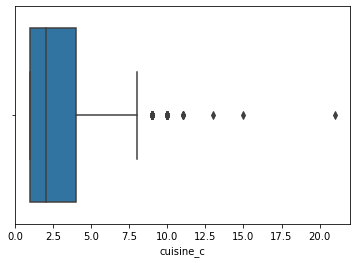

In [23]:
sns.boxplot(df['cuisine_c']);

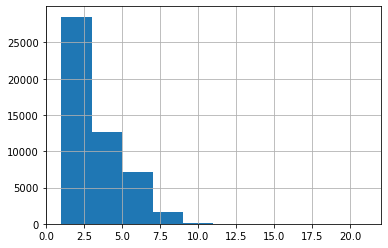

In [24]:
df.cuisine_c.hist();

In [25]:
print('–≤—ã–±—Ä–æ—Å—ã', outliers_iqr(df.cuisine_c))

–≤—ã–±—Ä–æ—Å—ã (-3.5, 8.5)


In [26]:
df[df.cuisine_c > 8.5]

id       city                                            cuisine  \
679     id_679     Madrid  ['Mexican', 'Latin', 'Contemporary', 'Fusion',...   
832     id_832   Budapest  ['Italian', 'French', 'German', 'European', 'H...   
1358   id_1358   Budapest  ['International', 'Grill', 'Barbecue', 'Europe...   
2292   id_2292     Vienna  ['German', 'Austrian', 'European', 'Asian', 'C...   
3184   id_3184       Rome  ['Italian', 'Pizza', 'Seafood', 'Mediterranean...   
...        ...        ...                                                ...   
48241    id_17  Edinburgh  ['Mediterranean', 'Barbecue', 'Turkish', 'Euro...   
49276    id_67     Warsaw  ['Lebanese', 'Mediterranean', 'Middle Eastern'...   
49413    id_93  Amsterdam  ['Asian', 'Italian', 'French', 'American', 'In...   
49614   id_106  Edinburgh  ['American', 'Bar', 'British', 'Pub', 'Scottis...   
49955  id_1502  Barcelona  ['Cafe', 'International', 'Mediterranean', 'Sp...   

       ranking     price  number  \
679      168.0  $$ - $$$   144.0   
832      422.0  $$ - $$$    41.0   
1358     319.0  $$ - $$$   241.0   
2292    1379.0  $$ - $$$    42.0   
3184     774.0  $$ - $$$   893.0   
...        ...       ...     ...   
48241     18.0  $$ - $$$   440.0   
49276     68.0  $$ - $$$   180.0   
49413     94.0  $$ - $$$  1480.0   
49614    107.0  $$ - $$$  1072.0   
49955   1503.0  $$ - $$$    43.0   

                                                 reviews  \
679    [['Great Mexican cuisine is a lively neighbor....   
832    [['Nice place, nice staff', 'Perfect'], ['11/1...   
1358   [['Good value for your money', 'Nice evening d...   
2292   [['Traditional Austrian dishes', 'Delicious Au...   
3184   [['Waterfront experience', 'Excellent location...   
...                                                  ...   
48241  [['Dinner', 'Still the best'], ['01/10/2018', ...   
49276  [['Good place in Warsaw', 'Exceeded the expect...   
49413  [['Amazing place, great food & vibe - you MUS....   
49614  [['Great burgers!', 'Great for meat lovers, bu...   
49955  [['Perfect üëå', 'A great alternative to the sho...   

                                                  URL_TA      ID_TA  sample  \
679    /Restaurant_Review-g187514-d10494492-Reviews-M...  d10494492       0   
832    /Restaurant_Review-g274887-d11806031-Reviews-M...  d11806031       0   
1358   /Restaurant_Review-g274887-d1023224-Reviews-Tr...   d1023224       0   
2292   /Restaurant_Review-g190454-d1907599-Reviews-Gi...   d1907599       0   
3184   /Restaurant_Review-g187791-d1641052-Reviews-Cu...   d1641052       0   
...                                                  ...        ...     ...   
48241  /Restaurant_Review-g186525-d8699437-Reviews-Ad...   d8699437       1   
49276  /Restaurant_Review-g274856-d3854108-Reviews-Le...   d3854108       1   
49413  /Restaurant_Review-g188590-d7231902-Reviews-Fo...   d7231902       1   
49614  /Restaurant_Review-g186525-d1811602-Reviews-Th...   d1811602       1   
49955  /Restaurant_Review-g187497-d12036041-Reviews-P...  d12036041       1   

       rating  cuisine_c  
679       0.0          9  
832       0.0         10  
1358      0.0          9  
2292      0.0         10  
3184      0.0          9  
...       ...        ...  
48241     4.5          9  
49276     4.5          9  
49413     4.5         21  
49614     4.5          9  
49955     4.5          9  

[126 rows x 12 columns]

In [166]:
df.cuisine_c = df.cuisine_c.apply(lambda x: np.log(x))
print('–º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ', df.cuisine_c.max())
print('–≤—ã–±—Ä–æ—Å—ã', outliers_iqr(df.cuisine_c))
print('–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ', df.cuisine_c.value_counts())

–º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 3.044522437723423
–≤—ã–±—Ä–æ—Å—ã (-2.0794415416798357, 3.465735902799726)
–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ 0.000000    20744
0.693147     7794
1.098612     6638
1.386294     5948
1.609438     4482
1.791759     2611
1.945910     1294
2.079442      363
2.197225       93
2.302585       26
2.397895        4
2.708050        1
2.564949        1
3.044522        1
Name: cuisine_c, dtype: int64


<AxesSubplot:>

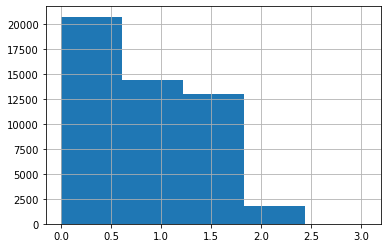

In [28]:
df.cuisine_c.hist(bins = 5)

C:\Users\1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


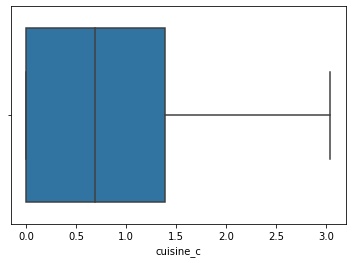

In [29]:
sns.boxplot(df.cuisine_c);

# rating

—É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è [0.  3.5 4.  4.5 5.  3.  2.5 2.  1.  1.5]
–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ 4.0    13692
4.5    10929
0.0    10000
3.5     6824
5.0     3879
3.0     2955
2.5      915
2.0      466
1.0      201
1.5      139
Name: rating, dtype: int64


<AxesSubplot:>

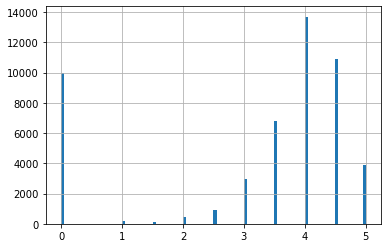

In [30]:
print('—É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', df.rating.unique())
print('–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ', df.rating.value_counts())
df.rating.hist(bins = 100)

# price

In [167]:
print('—É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', df.price.unique())
price_vl = df.price.value_counts()
print('–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ\n', price_vl)
print(df.price.isna().sum()/50000*100)
print(df[df['sample'] == 0].price.isna().sum())
print(df[df['sample'] == 1].price.isna().sum())

—É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è ['$$ - $$$' '$$$$' '$' nan]
–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ
 $$ - $$$    23041
$            7816
$$$$         1782
Name: price, dtype: int64
34.721999999999994
3475
13886


In [32]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –∫–æ–ª–æ–Ω–∫—É –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π
df_stat = pd.DataFrame()
df_stat['price'] = df['price']
df_stat['rating'] = df['rating']
df_stat['sample'] = df['sample']
df_stat = df_stat[df['sample'] == 1]
get_stat_dif('price')

–ù–∞–π–¥–µ–Ω—ã —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –¥–ª—è –∫–æ–ª–æ–Ω–∫–∏ price


In [168]:
# –ø–æ–º–µ—Ç–∏–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –µ—Å—Ç—å NaN
df['price_ind'] = df.price.isna()
df['price_ind'] = df['price_ind'].apply(lambda x: 0 if x else 1)

In [169]:
# –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –∏–º–µ—é—â–∏–º—Å—è –¥–∞–Ω–Ω—ã–º
price_list = [price_vl.index[x] for x in range(3)]
p = [price_vl[z]/price_vl.sum() for z in range(3)]
print(price_list, p)
a = np.random.choice(price_list, df.price.isna().sum(), p=p)
count = 0
for i in range(len(df.price)):
    if pd.isna(df.loc[i, 'price']) :
        df.loc[i, 'price'] = a[count]
        count += 1
print(df.price.value_counts())

['$$ - $$$', '$', '$$$$'] [0.7059346180949171, 0.23946812095958822, 0.054597260945494656]
$$ - $$$    35300
$           11971
$$$$         2729
Name: price, dtype: int64


<AxesSubplot:>

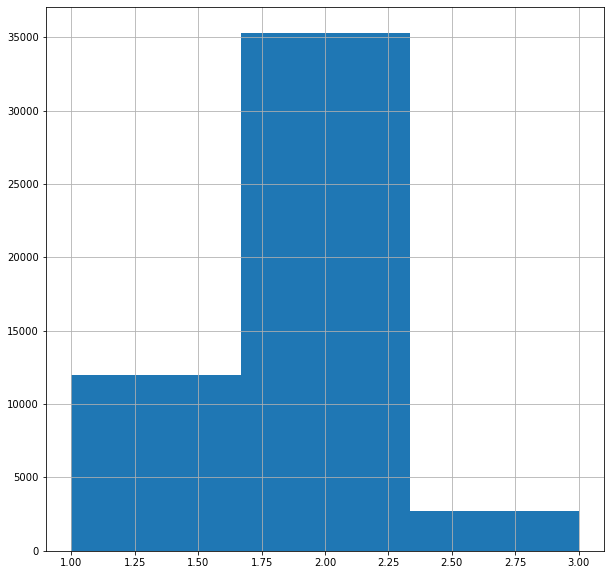

In [170]:
# —Å–æ—Ö—Ä–∞–Ω–∏–º –∫–æ–ª–æ–Ω–∫—É —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
df['price1'] = df.price.copy()
# –∑–∞–º–µ–Ω–∏–º –Ω–∞ —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø–æ –ø—Ä–∏–Ω—Ü–∏–ø—É LabelEncoding
df.price = df.price.apply(lambda x: 1 if x == '$' else 2 if x == '$$ - $$$' else 3)
df.price.hist(bins = 3)

In [36]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –∫–æ–ª–æ–Ω–∫—É –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –ø–æ—Å–ª–µ –º–∞–Ω–∏–ø—É–ª—è—Ü–∏–π
df_stat = pd.DataFrame()
df_stat['price'] = df['price']
df_stat['rating'] = df['rating']
df_stat['sample'] = df['sample']
df_stat = df_stat[df['sample'] == 1]
get_stat_dif('price')

–ù–∞–π–¥–µ–Ω—ã —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –¥–ª—è –∫–æ–ª–æ–Ω–∫–∏ price


# number

–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ
 2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: number, Length: 1573, dtype: int64
–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ 3200


<AxesSubplot:>

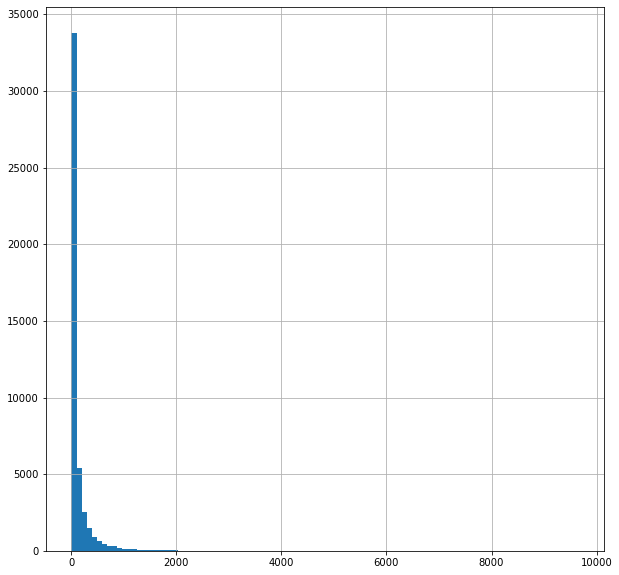

In [171]:
print('–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ\n', df.number.value_counts())
print('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫', df.number.isna().sum())
# –ø–æ–º–µ—Ç–∏–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –µ—Å—Ç—å NaN
df['number_ind'] = df.number.isna()
df['number_ind'] = df['number_ind'].apply(lambda x: 0 if x else 1)
df.number.hist(bins = 100)

In [172]:
df_isna = df[df.number.isna()]
df_isna['reviews'].unique()

array(['[[], []]', '[["Nova\' Doba"], [\'01/26/2017\']]',
       "[['South American food at its best!'], ['09/05/2013']]", ...,
       "[['Small, Friendly Place on the Mile'], ['11/15/2015']]",
       "[['Personal expirence'], ['10/27/2017']]",
       "[['I love this place!'], ['08/24/2015']]"], dtype=object)

In [173]:
df_isna['reviews'].nunique()

1177

In [174]:
df_isna.reviews.isna().sum()

1

In [175]:
df_isna[df_isna.reviews.isna()]

id    city cuisine  ranking  price  number reviews  \
9608  id_9608  Vienna     NaN   1779.0      1     NaN     NaN   

                                                 URL_TA      ID_TA  sample  \
9608  /Restaurant_Review-g190454-d12605368-Reviews-R...  d12605368       0   

      rating  cuisine_c  price_ind price1  number_ind  
9608     0.0        0.0          0      $           0

In [176]:
df_isna['reviews'].value_counts()

[[], []]                                                               2023
[['OK Noodles, no athmosphere'], ['09/13/2016']]                          1
[['Value for money'], ['12/15/2013']]                                     1
[["Fresh and Vibrant, It's more than just Jui..."], ['02/13/2015']]       1
[['shockingly dissapointed'], ['10/23/2017']]                             1
                                                                       ... 
[['Delicious pastries, not so nice interior'], ['08/27/2015']]            1
[['Unique Chicken Shop'], ['01/27/2017']]                                 1
[['Cozy rum bar'], ['11/03/2016']]                                        1
[['Filling portions at any time of day or nig...'], ['06/29/2015']]       1
[['Mixed report; but overall good'], ['06/13/2017']]                      1
Name: reviews, Length: 1177, dtype: int64

In [177]:
df_isna['reviews'].value_counts().index[0][2]

']'

In [120]:
df.number.median()

33.0

In [178]:
for i in range(len(df)):
    if pd.isna(df.loc[i, 'number']):
        if not pd.isna(df.loc[i, 'reviews']):
            if df.loc[i, 'reviews'][2] != ']':
                df.loc[i, 'number'] = 1

In [179]:
df.number.isna().sum()

2024

In [180]:
df.number.fillna(0, inplace = True)

In [181]:
outliers_iqr(df.number)

(-140.0, 252.0)

In [182]:
df[df.number > 252.0]

id       city                                            cuisine  \
10       id_10       Rome                                                NaN   
14       id_14     Prague  ['European', 'Czech', 'Eastern European', 'Cen...   
16       id_16      Milan  ['Pizza', 'Vegetarian Friendly', 'Vegan Options']   
17       id_17     London  ['Bar', 'British', 'Pub', 'Vegetarian Friendly...   
29       id_29       Oslo  ['French', 'European', 'Norwegian', 'Italian',...   
...        ...        ...                                                ...   
49980   id_253       Rome  ['Italian', 'Seafood', 'Mediterranean', 'Europ...   
49985    id_56   Brussels  ['African', 'Ethiopian', 'Vegetarian Friendly'...   
49992    id_13  Stockholm  ['Swedish', 'Scandinavian', 'Vegetarian Friend...   
49996  id_6340      Paris  ['French', 'American', 'Bar', 'European', 'Veg...   
49999  id_4824      Milan                                        ['Spanish']   

       ranking  price  number  \
10      1209.0      2   306.0   
14      1105.0      2   273.0   
16      1825.0      2   322.0   
17      2349.0      2   282.0   
29       550.0      2   465.0   
...        ...    ...     ...   
49980    254.0      2   560.0   
49985     57.0      2   989.0   
49992     14.0      2  1162.0   
49996   6341.0      2   542.0   
49999   4827.0      2   260.0   

                                                 reviews  \
10     [['Very pretentious, but drinks are top notch'...   
14     [['Good food, beer, value and service', 'Eat u...   
16     [['truly Neapolitan pizza, new/slick location'...   
17     [['Quite a decent pub', 'in the middle of noth...   
29     [['Lovely food!', 'Nightmare'], ['02/26/2017',...   
...                                                  ...   
49980  [['Creative cocktails and pleasant atmosphere....   
49985  [['A nice experience with Ethiopian food', 'A ...   
49992  [['Great Viking Dinner', 'A foot stompingly go...   
49996  [['Parisian atmosphere', 'Bit pricey but inter...   
49999  [['Average', 'Nice an informal'], ['01/31/2016...   

                                                  URL_TA      ID_TA  sample  \
10     /Restaurant_Review-g187791-d7818546-Reviews-Je...   d7818546       0   
14     /Restaurant_Review-g274707-d1093021-Reviews-U_...   d1093021       0   
16     /Restaurant_Review-g187849-d11850449-Reviews-P...  d11850449       0   
17     /Restaurant_Review-g186338-d2188276-Reviews-Th...   d2188276       0   
29     /Restaurant_Review-g190479-d1495732-Reviews-Mo...   d1495732       0   
...                                                  ...        ...     ...   
49980  /Restaurant_Review-g187791-d8273642-Reviews-Su...   d8273642       1   
49985  /Restaurant_Review-g188644-d778285-Reviews-Kok...    d778285       1   
49992  /Restaurant_Review-g189852-d2560559-Reviews-Ai...   d2560559       1   
49996  /Restaurant_Review-g187147-d1800036-Reviews-La...   d1800036       1   
49999  /Restaurant_Review-g187849-d1109020-Reviews-Ta...   d1109020       1   

       rating  cuisine_c  price_ind    price1  number_ind  
10        0.0   0.000000          0  $$ - $$$           1  
14        0.0   1.386294          1  $$ - $$$           1  
16        0.0   1.098612          1  $$ - $$$           1  
17        0.0   1.609438          1  $$ - $$$           1  
29        0.0   1.791759          1  $$ - $$$           1  
...       ...        ...        ...       ...         ...  
49980     4.5   1.791759          1  $$ - $$$           1  
49985     4.0   1.386294          1  $$ - $$$           1  
49992     4.5   1.386294          1  $$ - $$$           1  
49996     3.5   1.609438          1  $$ - $$$           1  
49999     3.0   0.000000          1  $$ - $$$           1  

[5946 rows x 15 columns]

In [41]:
# # –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –∏–º–µ—é—â–∏–º—Å—è –¥–∞–Ω–Ω—ã–º
# number_vl = df.number.value_counts()
# number_list = [number_vl.index[x] for x in range(len(number_vl))]
# p = [number_vl[z]/number_vl.sum() for z in number_vl.index]
# a = np.random.choice(number_list, df.number.isna().sum(), p=p)
# count = 0
# for i in range(len(df.number)):
#     if pd.isna(df.loc[i, 'number']) :
#         df.loc[i, 'number'] = a[count]
#         count += 1
# print(df.number.value_counts())

2.0       2564
3.0       2183
4.0       1819
5.0       1569
6.0       1349
          ... 
758.0        1
1063.0       1
1028.0       1
1108.0       1
1543.0       1
Name: number, Length: 1573, dtype: int64


In [183]:
# –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –∫–æ–ª–æ–Ω–∫—É
df.number = MMS(df.number)

<AxesSubplot:>

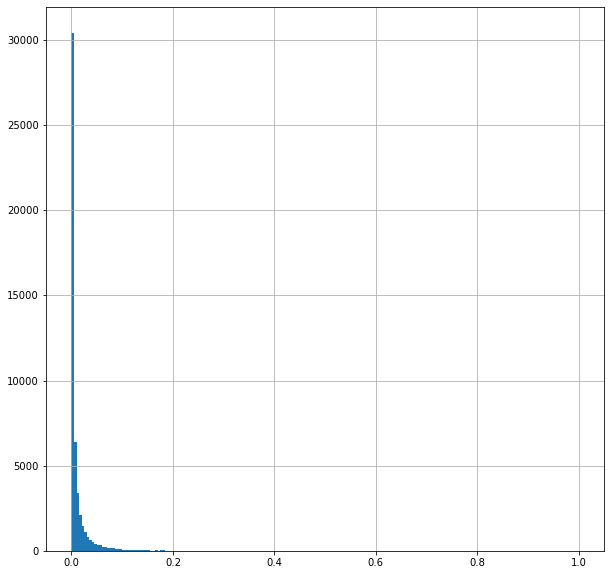

In [184]:
df.number.hist(bins = 200)

In [185]:
outliers_iqr(df.number)

(-0.014492753623188404, 0.02608695652173913)

In [186]:
df[df.number > 0.02608695652173913]

id       city                                            cuisine  \
10       id_10       Rome                                                NaN   
14       id_14     Prague  ['European', 'Czech', 'Eastern European', 'Cen...   
16       id_16      Milan  ['Pizza', 'Vegetarian Friendly', 'Vegan Options']   
17       id_17     London  ['Bar', 'British', 'Pub', 'Vegetarian Friendly...   
29       id_29       Oslo  ['French', 'European', 'Norwegian', 'Italian',...   
...        ...        ...                                                ...   
49980   id_253       Rome  ['Italian', 'Seafood', 'Mediterranean', 'Europ...   
49985    id_56   Brussels  ['African', 'Ethiopian', 'Vegetarian Friendly'...   
49992    id_13  Stockholm  ['Swedish', 'Scandinavian', 'Vegetarian Friend...   
49996  id_6340      Paris  ['French', 'American', 'Bar', 'European', 'Veg...   
49999  id_4824      Milan                                        ['Spanish']   

       ranking  price    number  \
10      1209.0      2  0.031677   
14      1105.0      2  0.028261   
16      1825.0      2  0.033333   
17      2349.0      2  0.029193   
29       550.0      2  0.048137   
...        ...    ...       ...   
49980    254.0      2  0.057971   
49985     57.0      2  0.102381   
49992     14.0      2  0.120290   
49996   6341.0      2  0.056108   
49999   4827.0      2  0.026915   

                                                 reviews  \
10     [['Very pretentious, but drinks are top notch'...   
14     [['Good food, beer, value and service', 'Eat u...   
16     [['truly Neapolitan pizza, new/slick location'...   
17     [['Quite a decent pub', 'in the middle of noth...   
29     [['Lovely food!', 'Nightmare'], ['02/26/2017',...   
...                                                  ...   
49980  [['Creative cocktails and pleasant atmosphere....   
49985  [['A nice experience with Ethiopian food', 'A ...   
49992  [['Great Viking Dinner', 'A foot stompingly go...   
49996  [['Parisian atmosphere', 'Bit pricey but inter...   
49999  [['Average', 'Nice an informal'], ['01/31/2016...   

                                                  URL_TA      ID_TA  sample  \
10     /Restaurant_Review-g187791-d7818546-Reviews-Je...   d7818546       0   
14     /Restaurant_Review-g274707-d1093021-Reviews-U_...   d1093021       0   
16     /Restaurant_Review-g187849-d11850449-Reviews-P...  d11850449       0   
17     /Restaurant_Review-g186338-d2188276-Reviews-Th...   d2188276       0   
29     /Restaurant_Review-g190479-d1495732-Reviews-Mo...   d1495732       0   
...                                                  ...        ...     ...   
49980  /Restaurant_Review-g187791-d8273642-Reviews-Su...   d8273642       1   
49985  /Restaurant_Review-g188644-d778285-Reviews-Kok...    d778285       1   
49992  /Restaurant_Review-g189852-d2560559-Reviews-Ai...   d2560559       1   
49996  /Restaurant_Review-g187147-d1800036-Reviews-La...   d1800036       1   
49999  /Restaurant_Review-g187849-d1109020-Reviews-Ta...   d1109020       1   

       rating  cuisine_c  price_ind    price1  number_ind  
10        0.0   0.000000          0  $$ - $$$           1  
14        0.0   1.386294          1  $$ - $$$           1  
16        0.0   1.098612          1  $$ - $$$           1  
17        0.0   1.609438          1  $$ - $$$           1  
29        0.0   1.791759          1  $$ - $$$           1  
...       ...        ...        ...       ...         ...  
49980     4.5   1.791759          1  $$ - $$$           1  
49985     4.0   1.386294          1  $$ - $$$           1  
49992     4.5   1.386294          1  $$ - $$$           1  
49996     3.5   1.609438          1  $$ - $$$           1  
49999     3.0   0.000000          1  $$ - $$$           1  

[5946 rows x 15 columns]

# reviews

In [187]:
# –≤—ã–¥–µ–ª–∏–º –∏–∑ –∫–æ–ª–æ–Ω–∫–∏ –¥–∞—Ç—ã –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∏–º–∏
df4 = pd.DataFrame(df.reviews)
pattern = re.compile('\d+\/\d+\/\d+')
df4.reviews = df4.reviews.apply(lambda x: re.findall(pattern, str(x)))
df4['date2'] = df4.reviews.apply(lambda x: datetime.strptime(x[-1], '%m/%d/%Y') if len(x) == 2 else np.nan)
df4['date1'] = df4.reviews.apply(lambda x: datetime.strptime(x[0], '%m/%d/%Y') if len(x) == 2 or len(x) == 1 else np.nan)
df4['dt'] = df4.date1 - df4.date2
df4['dt'] = df4['dt'].apply(lambda x: x.days)

–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ 13798


<AxesSubplot:>

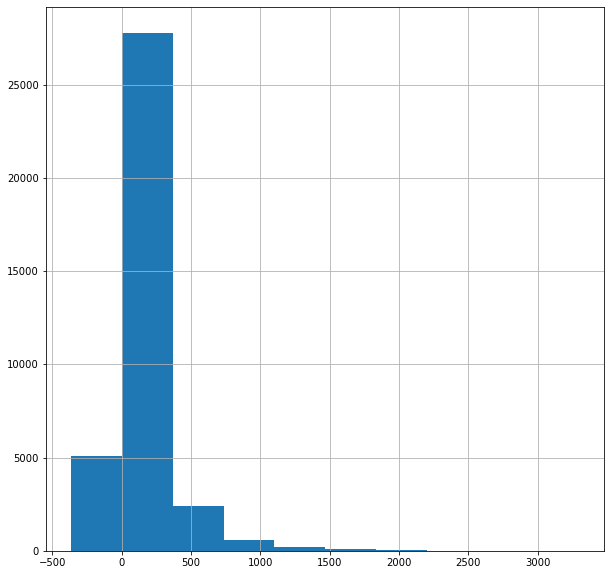

In [188]:
print('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫', df4.dt.isna().sum())
# –ø–æ–º–µ—Ç–∏–º –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏
df4['dt_ind'] = df4.dt.isna()
df4['dt_ind'] = df4['dt_ind'].apply(lambda x: 0 if x else 1)
df4.dt.hist()

In [189]:
# –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–¥–µ–ª–∞–µ–º –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏
df4.dt = np.abs(df4.dt)
dt_vl = df4.dt.value_counts()
print('–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ\n', dt_vl)

–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ
 1.0       829
0.0       631
2.0       629
3.0       606
4.0       538
         ... 
1124.0      1
918.0       1
2425.0      1
1355.0      1
1727.0      1
Name: dt, Length: 1310, dtype: int64


In [190]:
# –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –∏–º–µ—é—â–∏–º—Å—è –¥–∞–Ω–Ω—ã–º
dt_list = [dt_vl.index[x] for x in range(len(dt_vl))]
p = [dt_vl[z]/dt_vl.sum() for z in dt_vl.index]
a = np.random.choice(dt_list, df4.dt.isna().sum(), p=p)
count = 0
for i in range(len(df4.dt)):
    if pd.isna(df4.loc[i, 'dt']) :
        df4.loc[i, 'dt'] = a[count]
        count += 1
print(df4.dt.value_counts())

1.0       1196
0.0        886
2.0        864
3.0        853
4.0        737
          ... 
1779.0       1
659.0        1
1576.0       1
1001.0       1
1578.0       1
Name: dt, Length: 1310, dtype: int64


<AxesSubplot:>

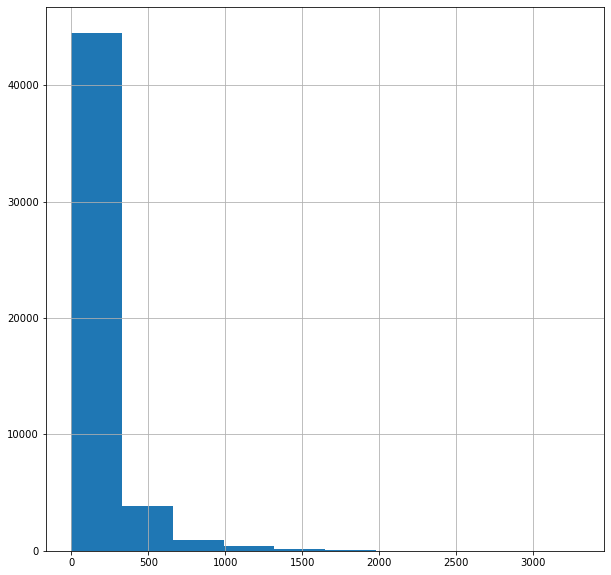

In [191]:
df4.dt.hist()

In [192]:
df['dt'] = df4.dt
df['dt_ind'] = df4['dt_ind']

In [193]:
df.dt = MMS(df.dt)

In [194]:
text = df.reviews.str.replace(',', '')

In [195]:
text.value_counts()

[[] []]                                                                                             8112
[['Excellent'] ['09/03/2015']]                                                                         2
[['Thursday snack' 'Good value for money & good food!'] ['03/13/2017' '06/20/2016']]                   2
[['The real codido madrile√±o'] ['03/31/2017']]                                                         2
[['Great coffee and pastries sandwiches ver...' 'Great breakfast!'] ['02/21/2017' '09/19/2016']]       2
                                                                                                    ... 
[['Great spot friendly staff' 'Nice vegan food'] ['10/24/2017' '02/28/2016']]                          1
[['Beyond Excellent' 'Dinner with friends'] ['01/07/2018' '12/29/2017']]                               1
[['The best' 'In the middle of the action'] ['12/02/2017' '11/03/2017']]                               1
[['Great cakes!' 'Excellent breakfast/pastry/service/d

In [196]:
pattern1 = re.compile('\D+')
text = text.apply(lambda x: re.findall(pattern1, str(x)))

In [197]:
analysisPol = text.apply(lambda x: TextBlob(str(x)).polarity)

In [198]:
df['analysisPol'] = analysisPol

In [199]:
analysisSub = text.apply(lambda x: TextBlob(str(x)).subjectivity)

In [200]:
df['analysisSub'] = analysisSub

<AxesSubplot:>

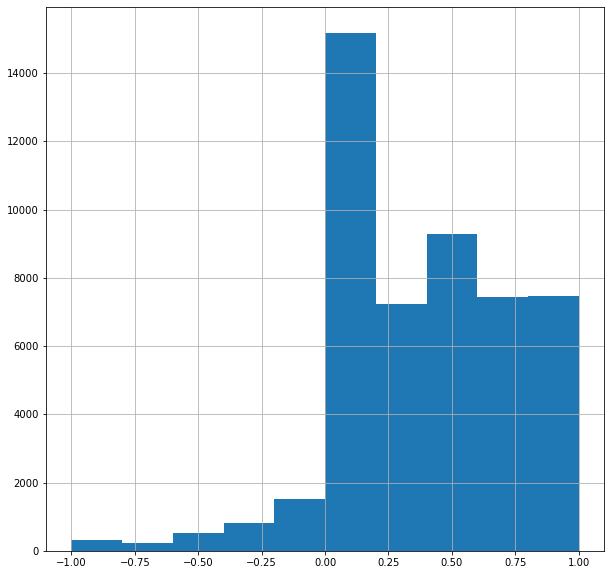

In [201]:
df['analysisPol'].hist()

<AxesSubplot:>

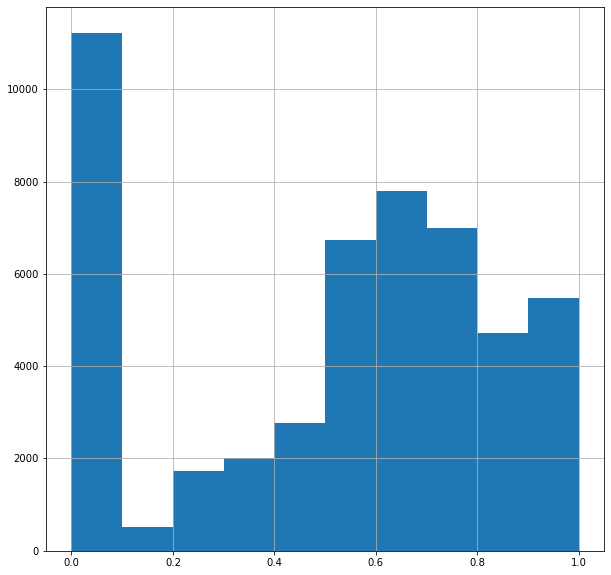

In [202]:
df['analysisSub'].hist()

In [203]:
corr_matrix = df.drop(columns=['id', 'sample']).corr(method='pearson')
corr_matrix

ranking     price    number    rating  cuisine_c  price_ind  \
ranking      1.000000 -0.061680 -0.223156 -0.109897  -0.320777  -0.233946   
price       -0.061680  1.000000  0.134776 -0.008169   0.091715  -0.000083   
number      -0.223156  0.134776  1.000000  0.011011   0.382942   0.266849   
rating      -0.109897 -0.008169  0.011011  1.000000   0.034211   0.020519   
cuisine_c   -0.320777  0.091715  0.382942  0.034211   1.000000   0.642196   
price_ind   -0.233946 -0.000083  0.266849  0.020519   0.642196   1.000000   
number_ind  -0.094831  0.010021  0.106146  0.000631   0.196323   0.267568   
dt           0.101178 -0.037228 -0.144184 -0.024660  -0.222431  -0.142745   
dt_ind      -0.149709  0.039375  0.227142  0.005490   0.431717   0.511168   
analysisPol -0.204977  0.015216  0.137815  0.081667   0.240331   0.243355   
analysisSub -0.118341  0.032793  0.143848  0.017122   0.272759   0.329264   

             number_ind        dt    dt_ind  analysisPol  analysisSub  
ranking       -0.094831  0.101178 -0.149709    -0.204977    -0.118341  
price          0.010021 -0.037228  0.039375     0.015216     0.032793  
number         0.106146 -0.144184  0.227142     0.137815     0.143848  
rating         0.000631 -0.024660  0.005490     0.081667     0.017122  
cuisine_c      0.196323 -0.222431  0.431717     0.240331     0.272759  
price_ind      0.267568 -0.142745  0.511168     0.243355     0.329264  
number_ind     1.000000 -0.004478  0.423555     0.169902     0.260916  
dt            -0.004478  1.000000 -0.006424    -0.039363    -0.019164  
dt_ind         0.423555 -0.006424  1.000000     0.359071     0.562176  
analysisPol    0.169902 -0.039363  0.359071     1.000000     0.559503  
analysisSub    0.260916 -0.019164  0.562176     0.559503     1.000000

<AxesSubplot:>

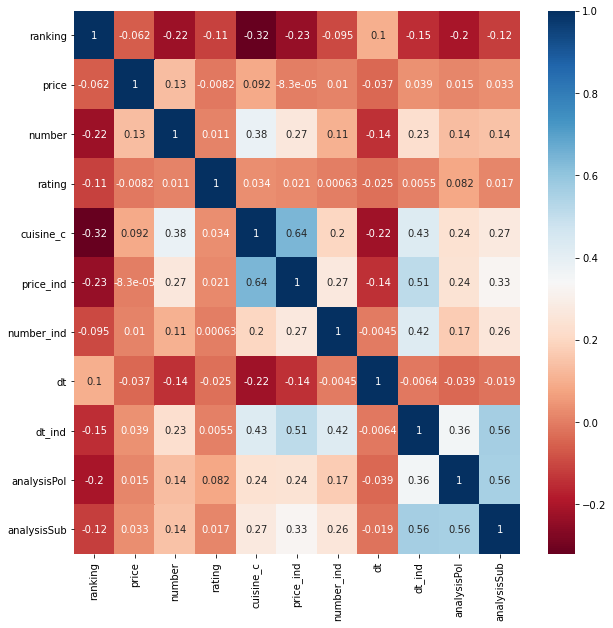

In [204]:
sns.heatmap(corr_matrix, annot = True, cmap="RdBu")

In [205]:
corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)].fillna('')

ranking price number rating cuisine_c price_ind number_ind dt  \
ranking           1                                                         
price                   1                                                   
number                         1                                            
rating                                1                                     
cuisine_c                                       1                           
price_ind                                                 1                 
number_ind                                                           1      
dt                                                                      1   
dt_ind                                                                      
analysisPol                                                                 
analysisSub                                                                 

            dt_ind analysisPol analysisSub  
ranking                                     
price                                       
number                                      
rating                                      
cuisine_c                                   
price_ind                                   
number_ind                                  
dt                                          
dt_ind           1                          
analysisPol                  1              
analysisSub                              1

In [206]:
df = pd.get_dummies(df, columns=['city'], prefix='city')

In [207]:
df = pd.get_dummies(df, columns=['price1'], prefix='price')

In [65]:
df

id                                            cuisine  ranking  \
0         id_0                                     ['Bar', 'Pub']  12963.0   
1         id_1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0   
2         id_2                            ['Vegetarian Friendly']    810.0   
3         id_3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0   
4         id_4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0   
...        ...                                                ...      ...   
49995   id_499  ['Italian', 'Vegetarian Friendly', 'Vegan Opti...    500.0   
49996  id_6340  ['French', 'American', 'Bar', 'European', 'Veg...   6341.0   
49997  id_1649                              ['Japanese', 'Sushi']   1652.0   
49998   id_640  ['Polish', 'European', 'Eastern European', 'Ce...    641.0   
49999  id_4824                                        ['Spanish']   4827.0   

       price    number                                            reviews  \
0          2  0.000207                                           [[], []]   
1          2  0.009836  [['Very good reviews!', 'Fine dining in Hakani...   
2          2  0.002692  [['Better than the Links', 'Ivy Black'], ['12/...   
3          3  0.020708  [['Most exquisite', 'Delicious and authentic']...   
4          3  0.016567  [['Always the best in bratislava', 'Very good ...   
...      ...       ...                                                ...   
49995      2  0.007973  [['The real Italian experience!', 'Wonderful f...   
49996      2  0.055912  [['Parisian atmosphere', 'Bit pricey but inter...   
49997      2  0.000207  [['Good by swedish standards', 'A hidden jewel...   
49998      2  0.007041  [['Underground restaurant', 'Oldest Restaurant...   
49999      2  0.026714  [['Average', 'Nice an informal'], ['01/31/2016...   

                                                  URL_TA      ID_TA  sample  \
0      /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1      /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2      /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3      /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4      /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   
...                                                  ...        ...     ...   
49995  /Restaurant_Review-g187849-d2104414-Reviews-Ro...   d2104414       1   
49996  /Restaurant_Review-g187147-d1800036-Reviews-La...   d1800036       1   
49997  /Restaurant_Review-g189852-d947615-Reviews-Sus...    d947615       1   
49998  /Restaurant_Review-g274856-d1100838-Reviews-Ho...   d1100838       1   
49999  /Restaurant_Review-g187849-d1109020-Reviews-Ta...   d1109020       1   

       rating  ...  city_Paris  city_Prague  city_Rome  city_Stockholm  \
0         0.0  ...           1            0          0               0   
1         0.0  ...           0            0          0               0   
2         0.0  ...           0            0          0               0   
3         0.0  ...           0            0          0               0   
4         0.0  ...           0            0          0               0   
...       ...  ...         ...          ...        ...             ...   
49995     4.5  ...           0            0          0               0   
49996     3.5  ...           1            0          0               0   
49997     4.5  ...           0            0          0               1   
49998     4.0  ...           0            0          0               0   
49999     3.0  ...           0            0          0               0   

       city_Vienna  city_Warsaw  city_Zurich  price_$  price_$$ - $$$  \
0                0            0            0        0               1   
1                0            0            0        0               1   
2                0            0            0        0               1   
3                0  

In [208]:
train_data = df[df['sample'] == 1].drop(columns=['id', 'cuisine', 'reviews', 'sample', 'URL_TA', 'ID_TA'])
test_data = df[df['sample'] == 0].drop(columns=['id', 'cuisine', 'reviews', 'sample', 'URL_TA', 'ID_TA'])

y = train_data.rating.values            # –Ω–∞—à —Ç–∞—Ä–≥–µ—Ç
X = train_data.drop(columns='rating')

In [209]:
# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ train_test_split –¥–ª—è —Ä–∞–∑–±–∏–≤–∫–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# –≤—ã–¥–µ–ª–∏–º 20% –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é (–ø–∞—Ä–∞–º–µ—Ç—Ä test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [154]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:
from sklearn.ensemble import RandomForestRegressor # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
from sklearn import metrics # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏

In [155]:
# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å (–ù–ê–°–¢–†–û–ô–ö–ò –ù–ï –¢–†–û–ì–ê–ï–ú)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [210]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
model.fit(X_train, y_train)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ä–µ–π—Ç–∏–Ω–≥–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [211]:
# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (y_pred) —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ (y_test), –∏ —Å–º–æ—Ç—Ä–∏–º –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –æ—Ç–ª–∏—á–∞—é—Ç—Å—è
# –ú–µ—Ç—Ä–∏–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è Mean Absolute Error (MAE) –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21572562499999998


In [212]:
y_pred_rnd = round_pred(y_pred)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rnd))

MAE: 0.184375


<AxesSubplot:>

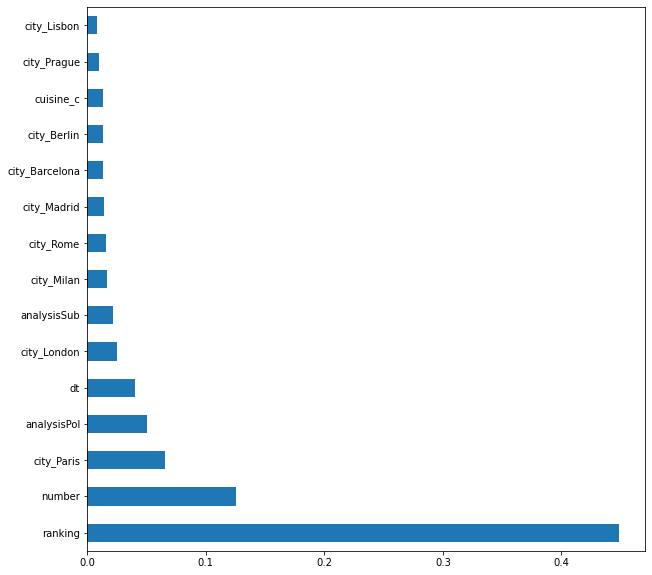

In [213]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [214]:
feat_importances[feat_importances > 0.009].sort_values()

city_Prague       0.010149
cuisine_c         0.013448
city_Berlin       0.013547
city_Barcelona    0.013599
city_Madrid       0.014067
city_Rome         0.015842
city_Milan        0.016907
analysisSub       0.021547
city_London       0.025197
dt                0.039968
analysisPol       0.050137
city_Paris        0.065898
number            0.125730
ranking           0.448233
dtype: float64